In [53]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# F - number of letters in first name
# L - number of letters in last name
F = len("Krzysztof")
L = len("Kordal")

## Excercise 1 -  Generated Quantities Block

1. Compile code_1.stan and sample from it using M=F
2. Create a pandas dataframe from resulting draws.
3. Plot a histogram for each of y_sim and lambda

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


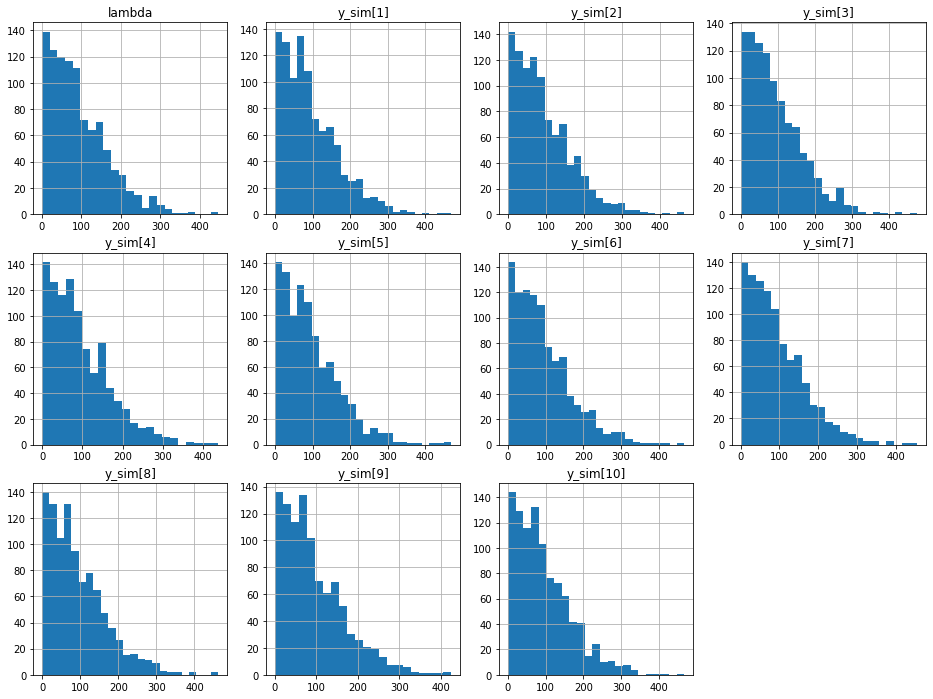

In [56]:
# 1.1. Compile
gen_quant = CmdStanModel(stan_file='stan_codes/code_1.stan')

samples = gen_quant.sample(data={'M':10}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

# 1.2. Create pandas dataframe
df = samples.draws_pd()

# 1.3. Plot histograms
## Cols and rows of subplots
ncols = 4
nrows = int(np.ceil(F/ncols))
## Get correct lengths for using later
theoretical_len = nrows * ncols
actual_len = len(df.columns[2:])
## Ploting
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))
for i in range(theoretical_len):
    r = i // ncols
    c = i % ncols
    if i >= actual_len:
        # Get rid of not used axes
        axs[r, c].axis("off")
    else:
        axs[r, c].hist(df.iloc[:, i+2], bins="auto")
        axs[r, c].set_title(df.columns[i+2])
        axs[r, c].grid()
plt.show()

In [17]:
display(df.columns)

Index(['lp__', 'accept_stat__', 'lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]',
       'y_sim[4]', 'y_sim[5]', 'y_sim[6]', 'y_sim[7]', 'y_sim[8]', 'y_sim[9]',
       'y_sim[10]'],
      dtype='object')

## Excercise 2 - Constraints on the data

1. Observe how constraints on data behave for code_2 and code_3

In [23]:
bern1 = CmdStanModel(stan_file='stan_codes/code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})
df = samp_bern1.draws_pd()
display(df.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.314525,0.922045,0.966326,1.372750,2.429000,0.0,3.793897,0.502656
std,0.755097,0.120395,0.066774,0.490273,1.136786,0.0,1.014143,0.220833
min,-8.988450,0.117345,0.910427,1.000000,1.000000,0.0,2.772710,0.011301
25%,-3.506110,0.893240,0.918331,1.000000,1.000000,0.0,3.045140,0.339066
50%,-3.007360,0.974753,0.938299,1.000000,3.000000,0.0,3.486465,0.502847
75%,-2.826938,1.000000,0.986295,2.000000,3.000000,0.0,4.214117,0.669908
max,-2.772590,1.000000,1.078280,3.000000,7.000000,0.0,10.597100,0.986021


In [24]:
bern2 = CmdStanModel(stan_file='stan_codes/code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
df = samp_bern2.draws_pd()
display(df.describe())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                     


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000
mean,-3.341107,0.901267,1.039315,1.384000,2.331500,0.0,3.845739,0.500960
std,0.752886,0.149562,0.094424,0.488471,1.031685,0.0,1.034555,0.226403
min,-8.997390,0.077193,0.937199,1.000000,1.000000,0.0,2.773760,0.011250
25%,-3.560265,0.864760,0.993570,1.000000,1.000000,0.0,3.083085,0.324373
50%,-3.041395,0.969011,1.013145,1.000000,3.000000,0.0,3.532775,0.496639
75%,-2.835077,1.000000,1.058890,2.000000,3.000000,0.0,4.274145,0.678669
max,-2.772590,1.000000,1.193770,3.000000,7.000000,0.0,11.905900,0.976657


### Conclusion

- Constraints don't work for `y` - gives errors when `y[1]=2` (thats why I changed code),
- But works for `N`.

## Excercise 3 - Constraints on parameters

1. Constraints in parameters behave more subtely. We are infering theta without data from its prior.
2. Please see diagnostic messages from code_4 and how samples from it compare to the probability distribution.
3. Verify what changes if constraints are added as in code_5

### Unconstrained parameters

In [25]:
model_gm1 = CmdStanModel(stan_file='stan_codes/code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan file /home/Lab 2/stan_codes/code_4.stan to exe file /home/Lab 2/stan_codes/code_4
INFO:cmdstanpy:compiled model executable: /home/Lab 2/stan_codes/code_4
INFO:cmdstanpy:created output directory: /home/Lab 2/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |██▎       | 00:00 Iteration: 1400 / 7000 [ 20%]  (Sampling)




chain 1 |██▊       | 00:01 Iteration: 1700 / 7000 [ 24%]  (Sampling)
chain 1 |███       | 00:01 Iteration: 1900 / 7000 [ 27%]  (Sampling)


chain 1 |███▎      | 00:02 Iteration: 2100 / 7000 [ 30%]  (Sampling)


chain 1 |███▌      | 00:02 Iteration: 2300 / 7000 [ 32%]  (Sampling)




chain 1 |███▊      | 00:02 Iteration: 2400 / 7000 [ 34%]  (Sampling)
chain 1 |███▉      | 00:03 Iteration: 2500 / 7000 [ 35%]  (Sampling)


chain 1 |████      | 00:03 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |████▏     | 00:03 Iteration: 2700 / 7000 [ 38%]  (Sampling)






INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab 2/samples/code_4-20230323073213_1.csv, /home/Lab 2/samples/code_4-20230323073213_2.csv, /home/Lab 2/samples/code_4-20230323073213_3.csv, /home/Lab 2/samples/code_4-20230323073213_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

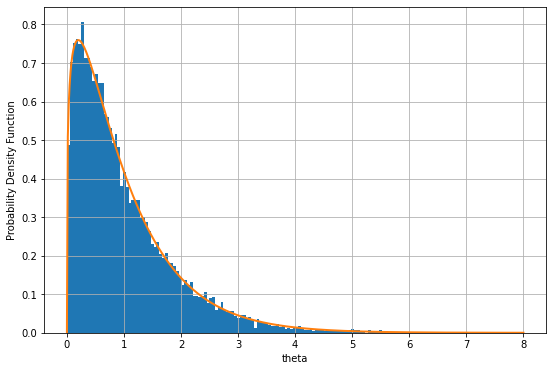

In [34]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

# Create dataframe
df = out_gamma1.draws_pd()

fig, ax = plt.subplots(figsize=(9, 6))
## add histogram of theta samples with 160 bins
ax.hist(df["theta"], bins=160, density=True)
ax.plot(xs, pdfs, linewidth=2)
ax.set_xlabel("theta")
ax.set_ylabel("Probability Density Function")
ax.grid()
plt.show()


### Constrained parameter

In [30]:
model_gm2 = CmdStanModel(stan_file='stan_codes/code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▏         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |██▏       | 00:01 Iteration: 1300 / 7000 [ 18%]  (Sampling)


chain 1 |██▌       | 00:01 Iteration: 1500 / 7000 [ 21%]  (Sampling)



chain 1 |██▊       | 00:02 Iteration: 1700 / 7000 [ 24%]  (Sampling)
chain 1 |██▉       | 00:02 Iteration: 1800 / 7000 [ 25%]  (Sampling)





chain 1 |███       | 00:02 Iteration: 1900 / 7000 [ 27%]  (Sampling)
chain 1 |███▏      | 00:03 Iteration: 2000 / 7000 [ 28%]  (Sampling)


chain 1 |███▎      | 00:03 Iteration: 2100 / 7000 [ 30%]  (Sampling)

chain 1 |███▍      | 00:03 Iteration: 2200 / 7000 [ 31%]  (Sampling)


chain 1 |███▌      | 00:03 Iteration: 2300 / 7000 [ 32%]  (Sampling)

chain 1 |███▊      | 00:04 Iteration: 2400 / 7000 [ 34%]  (Sampling)


chain 1 |███▉      | 00:04 Iteration: 2500 / 7000 [ 35%]


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/Lab 2/samples/code_5-20230323073629_1.csv, /home/Lab 2/samples/code_5-20230323073629_2.csv, /home/Lab 2/samples/code_5-20230323073629_3.csv, /home/Lab 2/samples/code_5-20230323073629_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

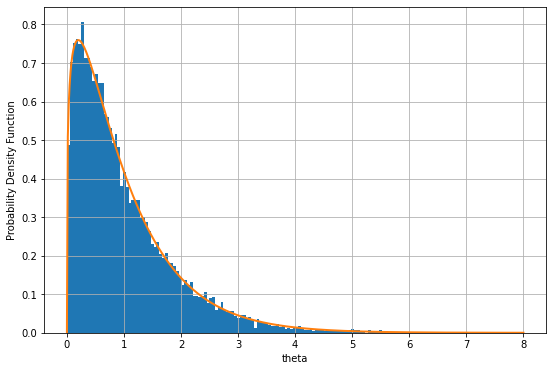

In [35]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

# Create dataframe
df = out_gamma1.draws_pd()

fig, ax = plt.subplots(figsize=(9, 6))
## add histogram of theta samples with 160 bins
ax.hist(df["theta"], bins=160, density=True)
ax.plot(xs, pdfs, linewidth=2)
ax.set_xlabel("theta")
ax.set_ylabel("Probability Density Function")
ax.grid()
plt.show()

## Excercise 4 -  Selection of parameters using equation solving

1. Stan outside of sampling allows for certain computational tools. In particular equation solving.
2. Using code_6 find the standard deviation of half_normal distribution, such that with 99% probability samples from it will be less than (F+L)/2.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


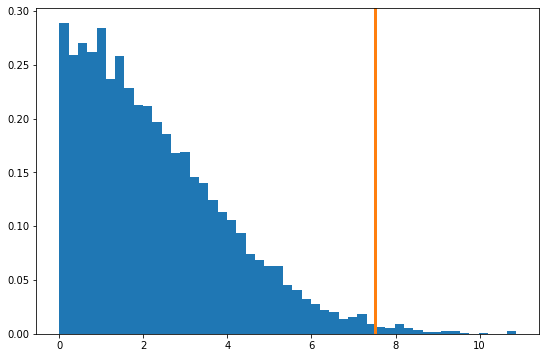

In [43]:
model_tune = CmdStanModel(stan_file='stan_codes/code_6.stan')

# Done at the beginning:
## F = # number of letters in the first name
## L = # number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

# Extract sigma values
sigma = tunes.draws_pd().iloc[0, 2]
# Get normal distribution
distribution_normal = np.abs(np.random.normal(0, sigma, 10000))

fig, ax = plt.subplots(figsize=(9, 6))
ax.hist(distribution_normal, bins="auto", density=True)
# get ylim for later
aux_ylim = ax.get_ylim()
# Plot (F+L)/2 line
ax.plot([(F+L)/2, (F+L)/2], [0, 1], linewidth=3)
# reapply ylim
ax.set_ylim(aux_ylim)
plt.show()

## Excercise 5 - different methods of defining models

1. Implement all the examples
2. Use them to generate distributuion for N=F.

In [46]:
model_samp_st = CmdStanModel(stan_file='stan_codes/code_7.stan')
model_log_target = CmdStanModel(stan_file='stan_codes/code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='stan_codes/code_9.stan')
data = {'N': F}
# Fake date -> #GDPR
seed = 4202137 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status




chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


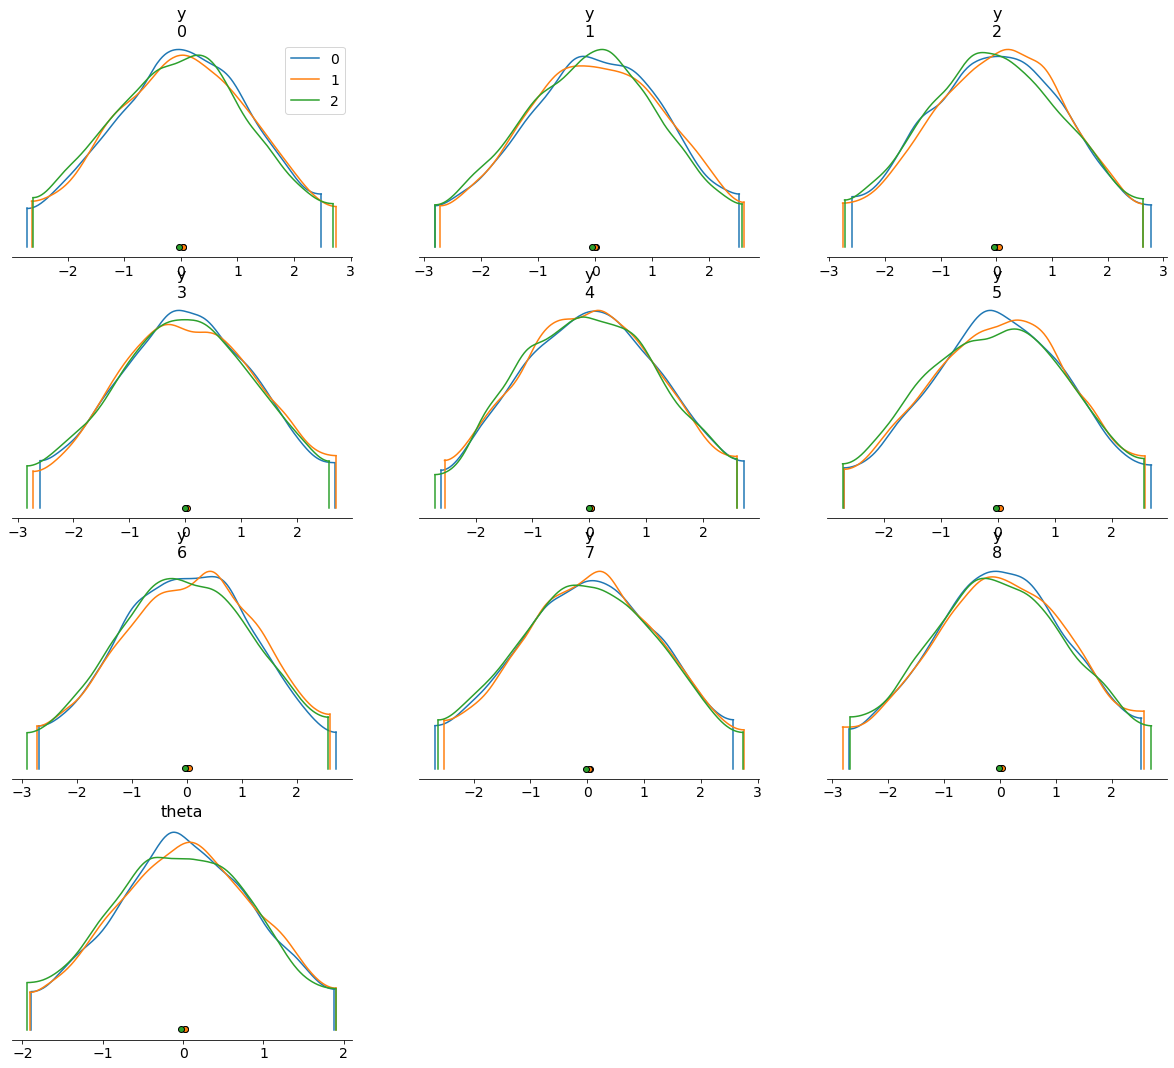

In [47]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

1. Implement ```code_10.stan```
2. Using generate_quantities() method use samples from previous excercises and and analyze mean of $y$.

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done pro

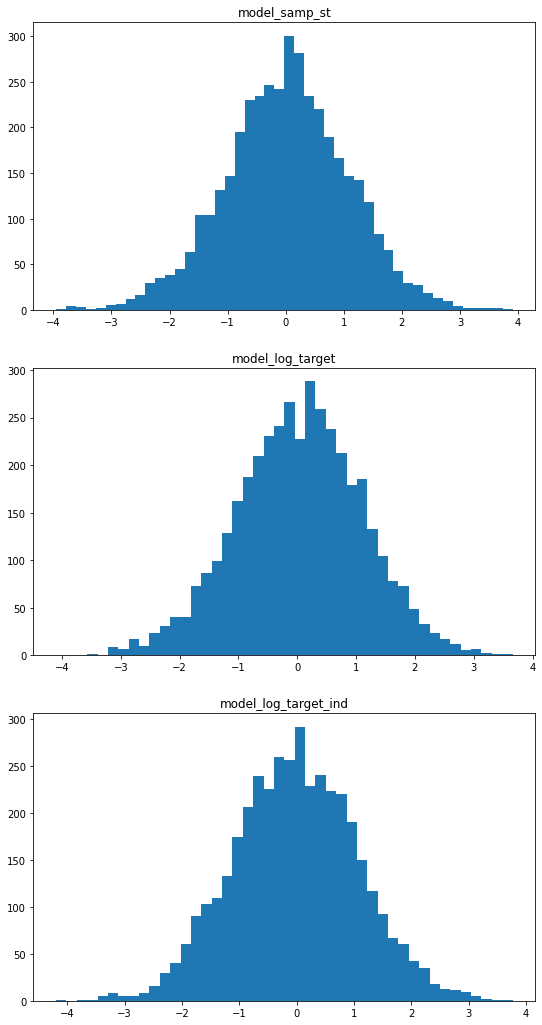

In [52]:
model_gq = CmdStanModel(stan_file='stan_codes/code_10.stan')
# list for outputs
mean_list = []
# Check for each result from previous exercise
for result in [result_1, result_2, result_3]:
    mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample=result)
    mean_list.append(mean_of_y.draws_pd().iloc[:, 0])

# Plot data
titles = ['model_samp_st', 'model_log_target', 'model_log_target_ind']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9, 18))
for i in range(3):
    axs[i].hist(mean_list[i], bins='auto')
    axs[i].set_title(titles[i])
plt.show()